In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
#from sklearn import preprocessing
from sklearn.metrics import classification_report 

In [3]:
bank=pd.read_csv('bank-full.csv')
bank

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [4]:
bank.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [5]:
from sklearn.linear_model import LogisticRegression
bank.shape

(45211, 1)

In [6]:
bank = pd.read_csv("bank-full.csv",sep=";")
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
bank["job"] = label_encoder.fit_transform(bank["job"])
bank["marital"] = label_encoder.fit_transform(bank["marital"])
bank["education"] = label_encoder.fit_transform(bank["education"])  
bank["default"] = label_encoder.fit_transform(bank["default"])
bank["housing"] = label_encoder.fit_transform(bank["housing"]) 
bank["loan"] = label_encoder.fit_transform(bank["loan"])
bank["contact"] = label_encoder.fit_transform(bank["contact"])
bank["month"] = label_encoder.fit_transform(bank["month"])
bank["poutcome"] = label_encoder.fit_transform(bank["poutcome"])
bank["y"] = label_encoder.fit_transform(bank["y"])

In [8]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [9]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [10]:
bank1= bank.iloc[:,[0,1,2,3,4,5,6,7,16]]

In [11]:
bank1

,age,job,marital,education,default,balance,housing,loan,y
0,58,4,1,2,0,2143,1,0,0
1,44,9,2,1,0,29,1,0,0
2,33,2,1,1,0,2,1,1,0
3,47,1,1,3,0,1506,1,0,0
4,33,11,2,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,1
45207,71,5,0,0,0,1729,0,0,1
45208,72,5,1,1,0,5715,0,0,1
45209,57,1,1,1,0,668,0,0,0


In [12]:
bank1.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
y            False
dtype: bool

In [13]:
from sklearn.linear_model import LogisticRegression
bank1.shape

(45211, 9)

In [14]:
X = bank1.iloc[:,:-2]
Y = bank1.iloc[:,-1]
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [15]:
X

,age,job,marital,education,default,balance,housing
0,58,4,1,2,0,2143,1
1,44,9,2,1,0,29,1
2,33,2,1,1,0,2,1
3,47,1,1,3,0,1506,1
4,33,11,2,3,0,1,0
...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0
45207,71,5,0,0,0,1729,0
45208,72,5,1,1,0,5715,0
45209,57,1,1,1,0,668,0


In [16]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [17]:
classifier.coef_

array([[-2.41064385e-02, -8.25285783e-03, -2.18723361e-01,
         1.53242280e-01, -5.28881150e-02,  3.02348537e-05,
        -1.06074273e+00]])

In [18]:
classifier.predict_proba (X)

array([[0.94221509, 0.05778491],
       [0.94936557, 0.05063443],
       [0.91608573, 0.08391427],
       ...,
       [0.89299922, 0.10700078],
       [0.8675809 , 0.1324191 ],
       [0.79186929, 0.20813071]])

In [19]:
y_pred = classifier.predict(X)
bank1["y_pred"] = y_pred
bank1

<ipython-input-19-832b688a1f43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank1["y_pred"] = y_pred


,age,job,marital,education,default,balance,housing,loan,y,y_pred
0,58,4,1,2,0,2143,1,0,0,0
1,44,9,2,1,0,29,1,0,0,0
2,33,2,1,1,0,2,1,1,0,0
3,47,1,1,3,0,1506,1,0,0,0
4,33,11,2,3,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,1,0
45207,71,5,0,0,0,1729,0,0,1,0
45208,72,5,1,1,0,5715,0,0,1,0
45209,57,1,1,1,0,668,0,0,0,0


In [20]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([bank1,y_prob],axis=1)
new_df 

,age,job,marital,education,default,balance,housing,loan,y,y_pred,0,1
0,58,4,1,2,0,2143,1,0,0,0,0.942215,0.057785
1,44,9,2,1,0,29,1,0,0,0,0.949366,0.050634
2,33,2,1,1,0,2,1,1,0,0,0.916086,0.083914
3,47,1,1,3,0,1506,1,0,0,0,0.914323,0.085677
4,33,11,2,3,0,1,0,0,0,0,0.788535,0.211465
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,1,0,0.837961,0.162039
45207,71,5,0,0,0,1729,0,0,1,0,0.895919,0.104081
45208,72,5,1,1,0,5715,0,0,1,0,0.892999,0.107001
45209,57,1,1,1,0,668,0,0,0,0,0.867581,0.132419


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39915     7]
 [ 5289     0]]


In [22]:
pd.crosstab(y_pred,Y) 

y,0,1
row_0,,
0,39915,5289
1,7,0


In [23]:
accuracy = sum(Y==y_pred)/bank.shape[0]
accuracy

0.8828603658401717

In [24]:
from sklearn.metrics import classification_report 
print (classification_report (Y, y_pred)) 

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     39922
           1       0.00      0.00      0.00      5289

    accuracy                           0.88     45211
   macro avg       0.44      0.50      0.47     45211
weighted avg       0.78      0.88      0.83     45211



In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score

0.4999123290416312

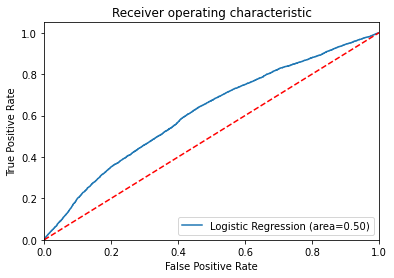

In [26]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 